Using logisting regression techniques covered in week 3 to explore the fashion_MNIST dataset

# 1. Introduction

The aim of part B is to use the logistic regression techniqes applied on MNIST dataset, on Zalando's fashion MNIST dataset.

<b>Logistic Regression :</b> Logistic Regression is a statistical method used for analyzing datasets in which there are one or more independent variables that determine an outcome. Logistic Regression is used when the dependent variable (target) is categorical. The outcome is typically a binary outcome, such as 1/0, true/false, although logistic regression can be extended to handle multi-class classification problems as well.  
Our goal is to use logistic regression to train a model that can classify 10 classes using the grayscale images present in the fashion_MNIST dataset.

# 2. About dataset
Fashion MNIST is a dataset of Zlando's article images comprised of grayscale apparel images. The Aim of the dataset is to be a replacement of the MNIST datset to benchmark ML algorithms. The training set contains 60,000 examples and the test set has 10,000 datsets.  
The training and test datasets have 60,000 and 10,000 rows respectively where each row represents an image and the label.  
Both of them have 785 columns where column 0 has the label and rest of the columns have pixel values. The pixel values can be reshaped to a 28x28 matrix that can represent a 28x28 grayscale image.  
Each example is a 28x28 grayscale image and has an assigned label.  
There are 10 unique lable classes such as T-shirt, Trouser, Ankle-Boot etc. The dataset comprises images that pose a classification challenge beyond the capacity of human visual discernment.

<img src="dataset-cover.png" />
<center>Fashion MNIST data-cover</center>

# 3. Why logistic regression can be used on Fashion_MNIST

Logistic regression is suitable for Fashion MNIST as a simple and efficient baseline model. It can be used for quick prototyping, understanding feature importance, and as a reference point for more advanced models. However, for achieving the highest accuracy on Fashion MNIST or similar image classification tasks, deep learning techniques like CNNs are often the preferred choice.  
For the initial part of this unit, we are only looking for an overview of the model and logistic regression is ideal for this since its simple yet powerful, computationally efficient, requires relatively fewer computational resources, quick to train, have a lower risk of overfitting, interpretable means the model can be understood unlike complex CNN architectures comprised of hidden layers ans black-boxes.

Loading libraries like pandas for data manipulation, matplotlib to plot data, sklearn to import the classificarion algorithm, data splittin and measure accuracy

In [145]:
import warnings
warnings.filterwarnings("ignore")

In [146]:
import numpy as np
import pandas as pd
import math
import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# 4. <b>Retrieving data</b>
Loadin data from "fashio_MNIST" dir in the working directory using  using pandas read_csv().  
<b>THE CODE CELL BELOW WILL HAVE TO BE REPLACED WITH CORRECT PATH IF THE DATASET IS STORED ANYWHERE ELSE.</b>

In [147]:
df_train = pd.read_csv("fashion_MNIST/fashion-mnist_train.csv")
df_test = pd.read_csv("fashion_MNIST/fashion-mnist_test.csv")

# 5. <b>Exploring data</b> 

<b>5.1 Explore the data and images : </b> Cheking the first few rows of the data can provide us with how data is arranged, how the dataset is labelled, data types and what variables are present in the dataset

In [148]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
# checking dataframe shape
# 60,000 values
# 785 variables
df_train.shape

(60000, 785)

The label contains numerical value, for ease of understanding the values can be mapped to a dictionary where each unique value from the label column corresponds to an apparel.  
df_train.dtypes() will show us the data type of each column.  
The label is int64 or numerical value, so the dictioanry key value will be of type integer and value can be String.  
In the dataset -  
• Label: The Target variable.  
• Pixels: The smallest unit of a Digital Image.

In [150]:
#label is int64 not string
mapping = {
    0 : 'T-shirt/top',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'}

In [151]:
# mapping the values
temp = df_train.replace({"label" : mapping})
temp.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,Pullover,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Shirt,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,T-shirt/top,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,Dress,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Using matplotlib we can plot the pixel values from the datset which are in column 1-784.  
Reshaping the values to 28x28 will give us a 28x28 matrix that can represent the original image.  
The image along with the label will provide us a better understandsing of the dataset.

Text(0.5, 1.0, 'T-shirt/top')

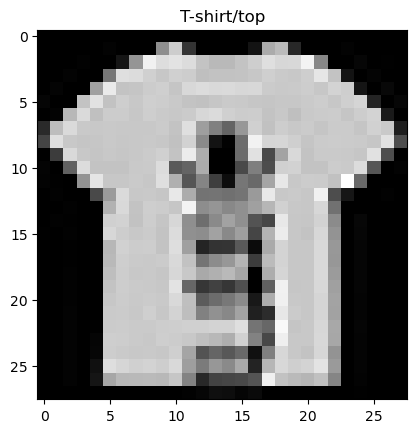

In [152]:
# get label
label = temp.iloc[:, 0]
# getting 28x28 matrix that will represent the image
# using a random value 13 to show th result
img = temp.drop('label', axis=1).values[13].reshape(28,28)
plt.imshow(img, cmap='gray')
plt.title(label[13])

<b>5.2 Corresponding Matrix : </b> The img variable holds the 28x28 corresponding matrix that represents the previous image

In [153]:
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   0,   0, 142, 205,  52,   0,
          0,   0,   0,  19, 171, 187,  41,   0,   0,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   2,   0,   0,  21, 149, 241, 221, 227, 220, 196,
        185, 185, 195, 206, 223, 215, 216, 244, 135,   0,   0,   6,   0,
          1,   0],
       [  0,   0,   3,   0,   0, 119, 223, 220, 208, 199, 208, 205, 191,
        194, 194, 195, 199, 207, 202, 200, 206, 230, 196,  19,   0,   4,
          0,   0],
       [  0,   4,   0,   0, 160, 234, 196, 197, 204, 207, 197, 216, 220,
        217, 218, 215, 216, 203, 201, 202, 205, 199, 211, 206,  21,   0,
          8,   0],
       [  5,   0,   0, 196, 226, 194, 206, 200, 207, 205, 201, 195, 193,
        198, 202, 201, 198, 197, 199, 199, 202, 205, 199, 207, 213,  36,
          0,   6],
       [  

<b>5.3 Describe the dataset: </b> Exploring the dataset sheds light on the data structure of this particular dataset.  
    a) The dataset is comprised of numerical values.  
    b) The first column(0) represents the labels which have been mapped to string values.  
    c) The rest of the columns(1-784) represent the pixel values.  
    d) Reshaping the pixel values to a 28x28 matrix can provide us with a corresponding matrix of the image.  
    e) The matrix can be plotted to get the original image.  
    f) The pixel values range from 0 - 255, can be normalized before using for logistic regression.  
    g) The label values has to be casted to categorical type before we can use it for logistic regression.

<b>5.4 Data cleansing : </b> We need to chek if the dataset has any missing values and if yes, how the missing parametres can be filled or discarded.  
Upon checking it seems the dataset has no missing values, so no further action required.

In [154]:
#check for NA
df_train.isna().sum()
df_train = df_train.dropna() #doesnt have any NA anyway

# 6. Building a logistic regression model

<b>6.1 Loading packages : </b> Packages required for the logistic regression model are Logistic Regression, Train_test_split, confusion_matrix, classification_report from sklearn.  
    The packages have been loaded at the beginning of the notebook

<b>6.2 Target Variable : </b>

In [155]:
#X colums
X = df_train[df_train.columns[1:]]
#pred
y = df_train["label"]

In [156]:
#same for test
testX = df_test[df_test.columns[1:]]
testY = df_test["label"]

<b>6.3 Data preparation : </b> Data preparation will include the following actions -  
    a) Normalize the test and train dataset, so we need to divide the numerical values with 255  
    b) Convert the labels to categorical variables since logistic regression only work when predicted variables are categorical

In [157]:
#preparing the test dataset
#scaling
testX = testX.astype("float32")/255
testY = pd.Categorical(testY)

In [158]:
#preparing the training set
#data scaling
X = X.astype("float32")/255
#y needs to be converted into categorical
y = pd.Categorical(y)

<b>6.4 Data splitting between Train and Validation : </b> 
The division of the training data into two distinct sets, namely the "Training Set" and the "Validation Set," serves specific purposes within the context of our study. The Training Set is primarily employed for the training of our machine learning model, allowing it to learn and adjust its parameters based on the provided data. In contrast, the Validation Set serves as a means to assess the performance and generalization capabilities of our model on the dataset.
To achieve this division, we employ the "train_test_split" method provided by the scikit-learn library, a widely-used machine learning toolkit. This method facilitates the creation of these separate sets, enabling us to effectively train and evaluate the model's performance in a systematic manner.

In [159]:
X, validation_train, y, validation_test = train_test_split(X, y,test_size=0.1, random_state=66)

<b>6.5 Selecting a linear regressuion classifier : </b>

In [160]:
#logistic regression
lr = LogisticRegression(solver = 'lbfgs', max_iter = 1000)

<b>6.6 Fitting the data : </b>

In [161]:
lr.fit(X, y)

LogisticRegression(max_iter=1000)

Because I'm having some issues with memory on my end and my kernel seems to restart every 30 mins or so, I will export the trained model so it can be loaded at a later time to predit.  
The issue is not likely to pursue on other devices since I'm working with a limited memory allocation.

In [162]:
import joblib
joblib.dump(lr, 'lr_fashionMNIST.pkl')

['lr_fashionMNIST.pkl']

In [163]:
# # load the model directly for testing
# import joblib
# lr = joblib.load('lr_fashionMNIST.pkl')

<b>6.7 Predicting on unseen data : </b>

In [164]:
y_pred = lr.predict(testX) 

In [165]:
score = lr.score(testX, testY)
print(score)

0.8531


# 7. Classification Report

<b>7.1 Confusion Matrix : </b> A confusion matrix is crucial to check how well a model performs when it's introduced to unseen test 
    data. It provides us with the model's class wise accuracy. Each column of the matrix represents a class and each row represents the prediction count, thus every well-performing model 
    has compratively larger values along the top-left to bottom right-diagonal.

In [166]:
# confusion matrix
conf = confusion_matrix(y_pred, testY)
conf

array([[818,   1,  24,  34,   3,   0, 152,   0,   6,   0],
       [  2, 972,   3,  28,   2,   4,   5,   0,   2,   0],
       [ 15,   3, 754,  16,  80,   1,  96,   0,   6,   0],
       [ 40,  15,  10, 861,  29,   0,  37,   0,   7,   0],
       [  0,   1, 105,  28, 805,   0,  89,   0,   4,   0],
       [  4,   2,   0,   2,   0, 914,   0,  35,   6,  15],
       [106,   6,  95,  23,  77,   1, 605,   0,  22,   0],
       [  0,   0,   0,   1,   0,  50,   0, 917,   5,  40],
       [ 15,   0,   9,   7,   4,   3,  16,   2, 940,   0],
       [  0,   0,   0,   0,   0,  27,   0,  46,   2, 945]], dtype=int64)

In [167]:
df_test.groupby(["label"])["label"].count()

label
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
Name: label, dtype: int64

<b>7.2 Visualise Correct Prediction : </b>Using the distribution counts from the test set and class wise prediction counts from confusion matrix, we can print the class wise 
accuracy of the model. The formula is -  
<i><center>(Correctly predicted class count / Total class count) * 100</center></i>

In [168]:
#class wise accuracy
for i in range(conf.shape[0]):
    print(f'{mapping[i]} class accuracy is {conf[i][i]/10}')

T-shirt/top class accuracy is 81.8
Trouser class accuracy is 97.2
Pullover class accuracy is 75.4
Dress class accuracy is 86.1
Coat class accuracy is 80.5
Sandal class accuracy is 91.4
Shirt class accuracy is 60.5
Sneaker class accuracy is 91.7
Bag class accuracy is 94.0
Ankle boot class accuracy is 94.5


Visualising a few correctly predicted images.

In [169]:
correct_classified = df_test
correct_classified.insert(0, "label_pred", y_pred)
correct_classified = correct_classified[correct_classified["label"] == correct_classified["label_pred"]]
correct_classified = correct_classified.replace({"label" : mapping})
correct_classified = correct_classified.replace({"label_pred" : mapping})
correct_classified.shape

(8531, 786)

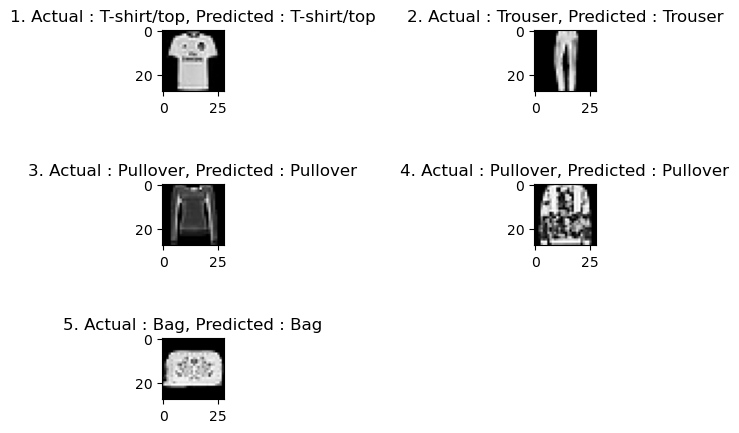

In [177]:
# we will show 5 correctly predicted images
#show the images
for i in range(5):  # Start the loop at index 0
    # getting 28x28 matrix that will represent the image
    img = correct_classified.iloc[:, 2:786].values[i].reshape(28, 28)  
    # Adjust the subplot index
    plt.subplot(3, 2, i + 1)   
    plt.imshow(img, cmap='gray')
    plt.title(f"{i + 1}. Actual : {correct_classified.iloc[i, 1]}, Predicted : {correct_classified.iloc[i, 0]}")

# Adjust the spacing
plt.subplots_adjust(wspace=2, hspace=1.5)
plt.show()

<b>7.3 Visualise misclassified images</b>

In [178]:
#visualise misclassified images
misclassified = pd.read_csv("fashion_MNIST/fashion-mnist_test.csv")
misclassified.insert(0, "label_pred", y_pred)
misclassified = misclassified[misclassified['label'] != misclassified['label_pred']]

In [179]:
#show the images
misclassified = misclassified.replace({"label" : mapping})
misclassified = misclassified.replace({"label_pred" : mapping})
misclassified

,label_pred,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
4,Coat,Dress,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,T-shirt/top,Pullover,0,0,0,0,0,44,105,44,...,105,64,30,0,0,0,0,0,0,0
12,Shirt,Coat,0,0,0,0,0,0,0,0,...,118,73,0,164,225,123,0,0,0,0
16,Coat,Shirt,0,0,0,0,0,0,1,5,...,90,60,0,129,146,78,0,0,0,0
30,Sneaker,Sandal,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,Pullover,Coat,0,0,0,0,0,0,1,0,...,0,0,0,84,113,52,0,0,0,0
9986,Bag,T-shirt/top,0,0,0,0,2,0,2,0,...,7,0,0,1,0,1,1,0,1,0
9994,Shirt,T-shirt/top,0,0,0,0,0,0,0,1,...,85,67,114,51,0,1,0,0,0,0
9998,Shirt,Bag,0,1,3,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [180]:
misclassified.shape

(1469, 786)

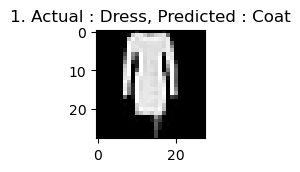

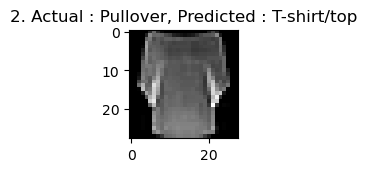

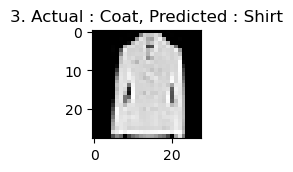

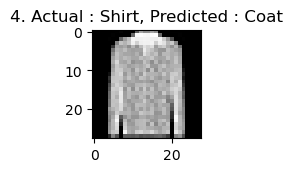

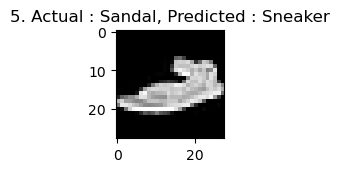

In [181]:
#showing 5 of the misclassified images
for i in range(5):
    # getting 28x28 matrix that will represent the image
    img = misclassified.iloc[:, 2:786].values[i].reshape(28,28)
    plt.subplot(3, 2, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{i+1}. Actual : {misclassified.iloc[i,1]}, Predicted : {misclassified.iloc[i, 0]}")
    plt.show()
# not doing a sub plot for this

<b>7.4 Visualise corrected images </b>

The model only predicted the possible classes for the test dataset rather than correcting the dataset.  
We can compare the results by vusalising a few correct and incorrect predictions.  
A few examples are - 

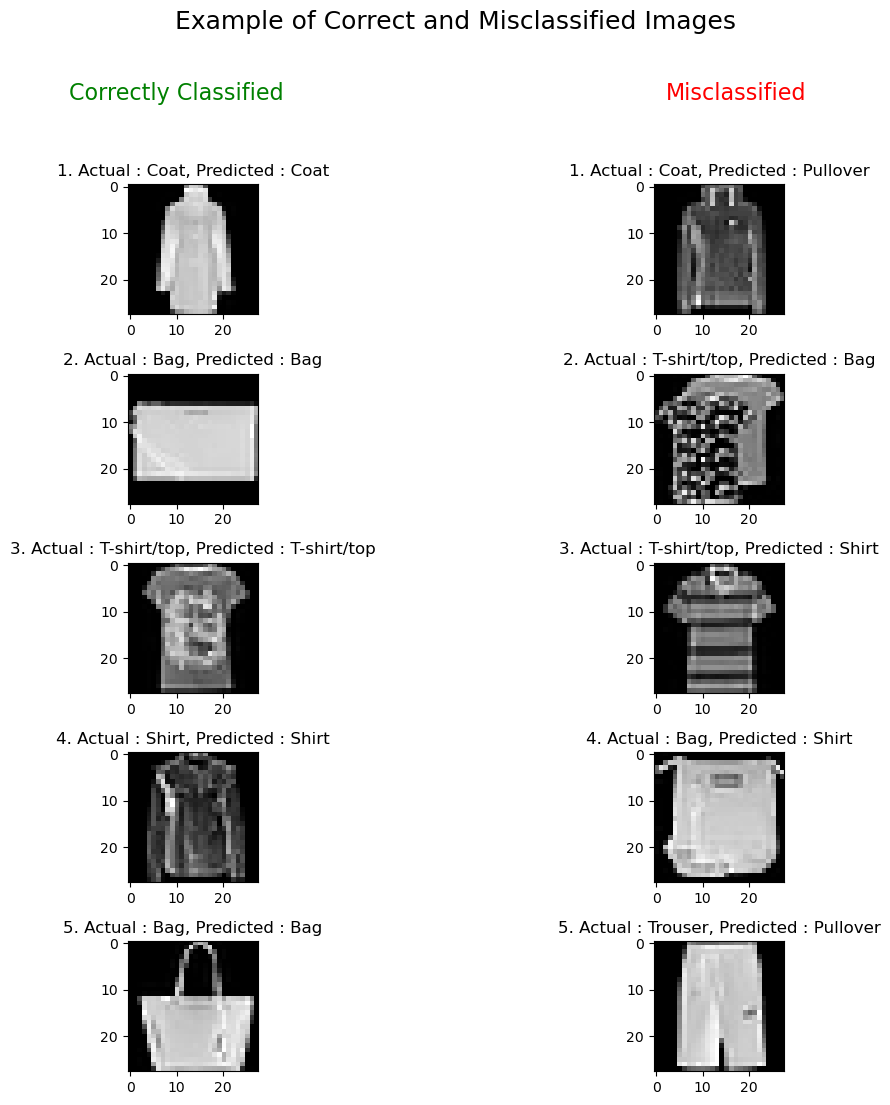

In [182]:
index = 0

# single figure outside the loop
fig = plt.figure(figsize=(14, 10))
plt.suptitle("Example of Correct and Misclassified Images", fontsize=18, y = 1.1)

# column names
plt.figtext(0.3, 1.01, 'Correctly Classified', fontsize=16, ha='center', color = "green")
plt.figtext(0.7, 1.01, 'Misclassified', fontsize=16, ha='center', color = "red")

for i in range(5): 
    # correct
    img = correct_classified.iloc[:, 2:786].values[correct_classified.shape[0] - 5 + i].reshape(28, 28)
    index = index + 1
    plt.subplot(5, 2, index)   
    plt.imshow(img, cmap='gray')
    plt.title(f"{i + 1}. Actual : {correct_classified.iloc[correct_classified.shape[0] - 5 + i, 1]}, Predicted : {correct_classified.iloc[correct_classified.shape[0] - 5 + i, 0]}")
    
    # incorrect
    img = misclassified.iloc[:, 2:786].values[misclassified.shape[0] - 5 + i].reshape(28,28)
    index = index + 1
    plt.subplot(5, 2, index)
    plt.imshow(img, cmap='gray')
    plt.title(f"{i+1}. Actual : {misclassified.iloc[misclassified.shape[0] - 5 + i, 1]}, Predicted : {misclassified.iloc[misclassified.shape[0] - 5 + i, 0]}")

plt.tight_layout()
plt.show()


Logistic regression relies on feature representations of the data and in the Fashion_MNIST dataset, the pixels represent features. If the features do not adequately capture the distinguishing characteristics of the different classes or if there is a lot of noise in the feature data, the model may not perform well. In the dataset shirts, pullovers and sometimes t-shirts can be visually similar, making it challenging for a simple model like logistic regression to distinguish between them accurately.  
Also images with non-regular characterstics like Misclassified(2) can be challenging since the image contains images of 2 t-shirts together, making it harder for the model if it has not seen similar images before. Also features like collar are present for both tops and shirts which can lead to misclassification.

# 8. Regularization
Regularization is a technique used in machine learning to prevent overfitting, which occurs when a model fits the training data too closely and performs poorly on unseen data.  
In logistic regression, regularization is used to constrain the coefficients (weights) associated with each feature to prevent them from becoming too large, by introducing a penalty term to the cost function. Essentially, large coefficients can make the model highly sensitive to small changes in the dataset, leading to poor accuracy and generalisation. The penalty term penalizes the complexity of the model by adding a term to the cost function based on the magnitude of the coefficients.  
There are two common types of regularization in logistic regression: L1 regularization (Lasso) and L2 regularization (Ridge).  
  
<b>L1 Regularization (Lasso): </b>
L1 regularization adds a penalty term that is proportional to the absolute values of the coefficients. This approach tends to push the coefficients of the irrelevant features to 0, which helps feature selection, simplifies the model and prevents overfitting.
The cost function for L1 regularization is:
<center><i>Cost = Original_Cost + λ * Σ|θ_i|</i></center>
  

<b>Original_Cost</b> is the original logistic regression cost.  
<b>λ</b> is the regularization parameter, which controls the strength of regularization.  
<b>θ_i</b> are the coefficients associated with each feature.  

<b>L2 Regularization (Ridge): </b>L2 regularization adds a penalty term to the cost function that is proportional to the square of the coefficients. This approach encourages all features to be small but not exactly 0, which prevents the model from being largely influenced by one particular feature. The cost function for L2 regularization is:
<center><i>Cost = Original_Cost + λ * Σ(θ_i^2)</i></center>
  
<b>Original_Cost</b> is the original logistic regression cost.  
<b>λ</b> is the regularization parameter, which controls the strength of regularization.  
<b>θ_i</b> are the coefficients associated with each feature.  

To add L1 or L2 regularization, we can use the following code snippet-

```
# for L1 lasso
lr = LogisticRegression(penalty='l1', solver='solver_function', C=1.0)
# for L2 Ridge
lr = LogisticRegression(penalty='l2', solver='solver_function', C=1.0)
```

<b>penalty='l1'</b> or <b>penalty='l2'</b> specifies the regularization technique L1 or L2.  
<b>solver = "solver_function"</b> the solver function for the model e.g. lbfgs, liblinear.  
<b>C=1.0</b> is the regularization strength parameter. A smaller C value increases the strength of regularization, which means the model will be more constrained by the penalty. Smaller C values lead to stronger regularization.

# 9. Saving the model

JobLib can be used to save the model as a pkl file. Since I have alreay saved the model, I will add the code as a snippet.  
```
import joblib
joblib.dump(lr, 'lr_fashionMNIST.pkl')
```

Loading the model-

In [183]:
myModel = joblib.load('lr_fashionMNIST.pkl')
myModel

LogisticRegression(max_iter=1000)

The loaded model can be used like any other trained model -  
a) Load the saved model using joblib.load('model_name').  
b) Prepare test data to make predictions on. This data should have the same 
format and features as the data the model was originally trained on.  
c) Use the predict method of the loaded model (loaded_model.predict(test_data)) to make predictions on the new 
data. The result is stored in the predictions variable.  
d) Finally, the prediction values can be compared against true lables to check accuracy